In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Singapore%20Airbnb/listings.csv")

In [3]:
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

In [5]:
dataset.drop(['id','name','host_name','host_id','last_review'],axis=1,inplace=True)
dataset.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,5149.000000,7907.000000,7907.000000
mean,1.314192,103.848787,169.332996,17.510054,12.807386,1.043669,40.607689,208.726318
std,0.030577,0.043675,340.187599,42.094616,29.707746,1.285851,65.135253,146.120034
min,1.243870,103.646560,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.295795,103.835825,65.000000,1.000000,0.000000,0.180000,2.000000,54.000000
50%,1.311030,103.849410,124.000000,3.000000,2.000000,0.550000,9.000000,260.000000
75%,1.322110,103.872535,199.000000,10.000000,10.000000,1.370000,48.000000,355.000000
max,1.454590,103.973420,10000.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


<AxesSubplot:>

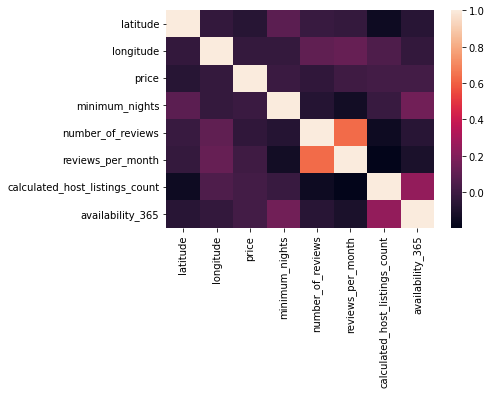

In [6]:
correlation_matrix=dataset.corr()
sns.heatmap(correlation_matrix)

In [7]:
dataset.drop(['reviews_per_month'],axis=1,inplace=True)
dataset.shape

(7907, 10)

In [8]:
dataset.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

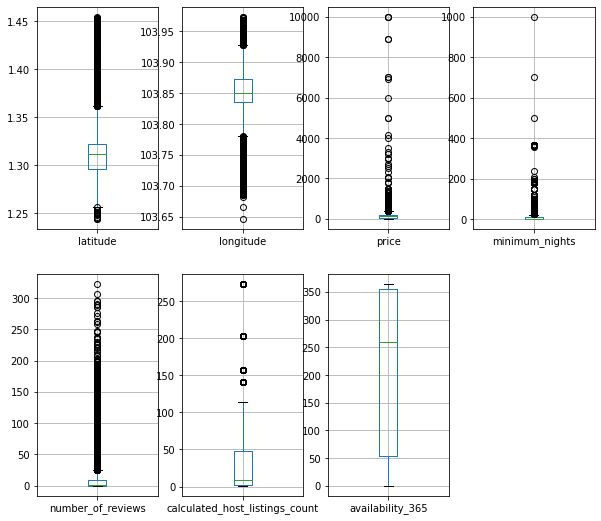

In [9]:
names=['latitude','longitude','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']
plt.figure(figsize=(10,9))
for i in range(1,8):
    
    plt.subplot(2,4,i)
    fig=dataset.boxplot(column=names[i-1])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

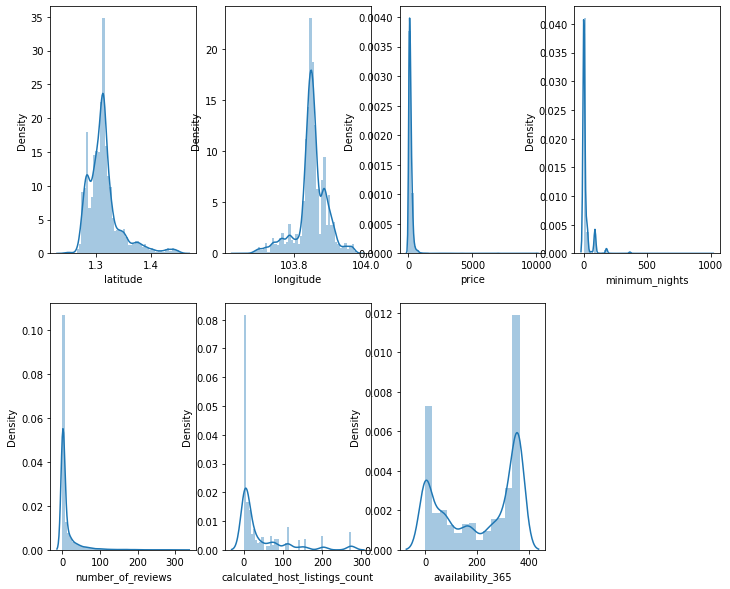

In [10]:
plt.figure(figsize=(12,10))
for j in range(1,8):
    plt.subplot(2,4,j)
    sns.distplot(dataset[names[j-1]])

In [11]:
std=np.std(dataset['latitude'])
mean=np.mean(dataset['latitude'])
median=np.median(dataset['latitude'])
outliers=[]
for x in dataset['latitude']:
    zscore=(x-mean)/std
    if zscore>abs(3):
        outliers.append(x)
len(outliers)

176

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'after removing outliers')

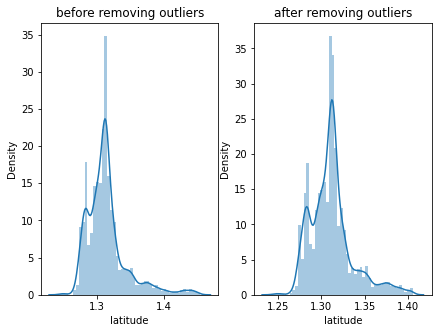

In [12]:
dataset_new=dataset.replace(outliers,median)
plt.figure(figsize=(7,5))
plt.subplot(1,2,1)
fig=sns.distplot(dataset['latitude'])
plt.title('before removing outliers')
plt.subplot(1,2,2)
fig2=sns.distplot(dataset_new['latitude'])
plt.title('after removing outliers')

In [13]:
std=np.std(dataset['longitude'])
mean=np.mean(dataset['longitude'])
median=np.median(dataset['longitude'])
outliers=[]
for x in dataset['longitude']:
    zscore=(x-mean)/std
    if -3<zscore>3:
        outliers.append(x)
len(outliers)

0

In [14]:
q1=dataset['minimum_nights'].quantile(0.25)
q3=dataset['minimum_nights'].quantile(0.75)
outlier=[]
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
for i in dataset['minimum_nights']:
    if i<lower_bound or i>upper_bound:
            outlier.append(i)        
len(outlier)

1407

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

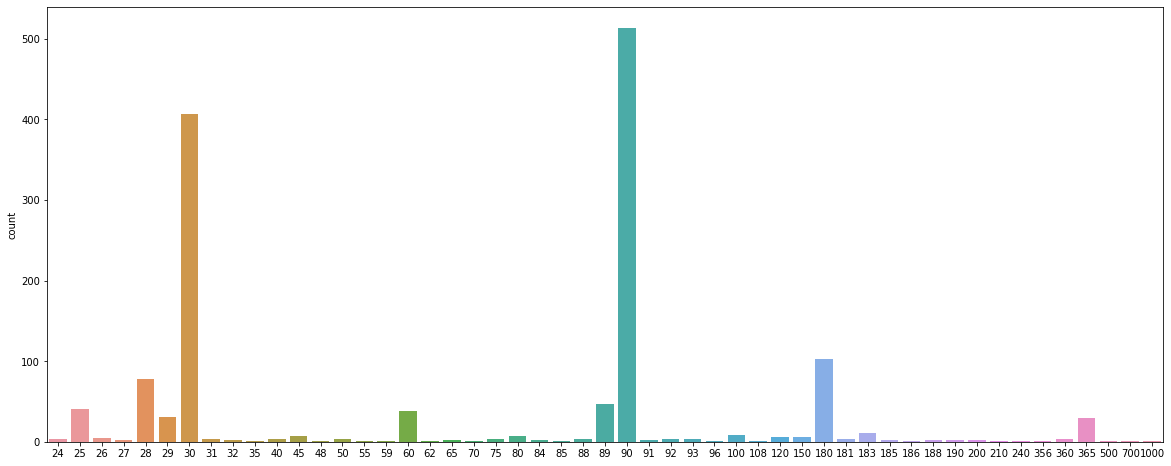

In [15]:
plt.figure(figsize=(20,8))
sns.countplot(outlier)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'after removing outliers')

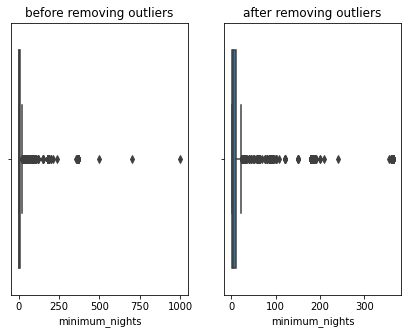

In [16]:
dataset_new=dataset[dataset['minimum_nights']<=365]
plt.figure(figsize=(7,5))
plt.subplot(1,2,1)
sns.boxplot(dataset['minimum_nights'])
plt.title('before removing outliers')
plt.subplot(1,2,2)
sns.boxplot(dataset_new['minimum_nights'])
plt.title('after removing outliers')

In [17]:
q1=dataset['calculated_host_listings_count'].quantile(0.25)
q3=dataset['calculated_host_listings_count'].quantile(0.75)
outlier=[]
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
for i in dataset['calculated_host_listings_count']:
    if i<lower_bound or i>upper_bound:
            outlier.append(i)        
len(outlier)

775

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

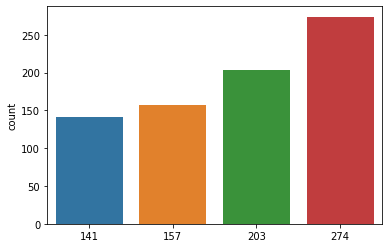

In [18]:
sns.countplot(outlier)

In [19]:
dataset_new["room_type"].nunique()

3

In [20]:
mappings={'Entire home/apt':1,'Private room':2,'Shared room':3}
dataset_new['room_type']=dataset_new['room_type'].map(mappings)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
dataset_new.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,North Region,Woodlands,1.44255,103.79580,2,83,180,1,2,365
1,Central Region,Bukit Timah,1.33235,103.78521,2,81,90,18,1,365
2,North Region,Woodlands,1.44246,103.79667,2,69,6,20,2,365
3,East Region,Tampines,1.34541,103.95712,2,206,1,14,9,353
4,East Region,Tampines,1.34567,103.95963,2,94,1,22,9,355


In [22]:
dataset_new['neighbourhood'].unique()

array(['Woodlands', 'Bukit Timah', 'Tampines', 'Bedok', 'Bukit Merah',
       'Newton', 'Geylang', 'River Valley', 'Jurong West', 'Rochor',
       'Queenstown', 'Serangoon', 'Marine Parade', 'Pasir Ris',
       'Toa Payoh', 'Outram', 'Punggol', 'Tanglin', 'Hougang', 'Kallang',
       'Novena', 'Downtown Core', 'Bukit Panjang', 'Singapore River',
       'Orchard', 'Ang Mo Kio', 'Bukit Batok', 'Museum', 'Sembawang',
       'Choa Chu Kang', 'Central Water Catchment', 'Sengkang', 'Clementi',
       'Jurong East', 'Bishan', 'Yishun', 'Mandai', 'Southern Islands',
       'Sungei Kadut', 'Western Water Catchment', 'Tuas', 'Marina South',
       'Lim Chu Kang'], dtype=object)

In [23]:
len(dataset_new['neighbourhood'].unique())

43

In [24]:
import category_encoders as ce
binary=ce.BinaryEncoder(cols=['neighbourhood'])
dataset_new=binary.fit_transform(dataset_new)
dataset_new.head()

,neighbourhood_group,neighbourhood_0,neighbourhood_1,neighbourhood_2,neighbourhood_3,neighbourhood_4,neighbourhood_5,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,North Region,0,0,0,0,0,1,1.44255,103.79580,2,83,180,1,2,365
1,Central Region,0,0,0,0,1,0,1.33235,103.78521,2,81,90,18,1,365
2,North Region,0,0,0,0,0,1,1.44246,103.79667,2,69,6,20,2,365
3,East Region,0,0,0,0,1,1,1.34541,103.95712,2,206,1,14,9,353
4,East Region,0,0,0,0,1,1,1.34567,103.95963,2,94,1,22,9,355


In [25]:
dataset['neighbourhood_group'].unique()

array(['North Region', 'Central Region', 'East Region', 'West Region',
       'North-East Region'], dtype=object)